Fikri Diva Sambasri

# **Data Loading**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Arti dari dataset Mall_customers :

1. Customer ID : ID dari customer

2. Gender : jenis kelamin customer

3. Age : umur dari customer

4. Annual Income : Pendapatan tahunan dari customer yang di punyai dalam bentuk $

5. Spending score : nilai pengeluaran yang dikeluarkan oleh customer

In [3]:
# melihat dimensi / ukuran dataset
df.shape

(200, 5)

In [4]:
# melihat tipe data dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Ada 1 kolom yang masih bertipe data object yaitu kolom Gender. Sehingga kolom Gender ini harus diubah ke bentuk numerik nantinya

In [5]:
# Cek data kosong apakah ada
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dari data di atas bahwa tidak ada data yang kosong sehingga tidak perlu mendrop baris datanya

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Data Visualization**

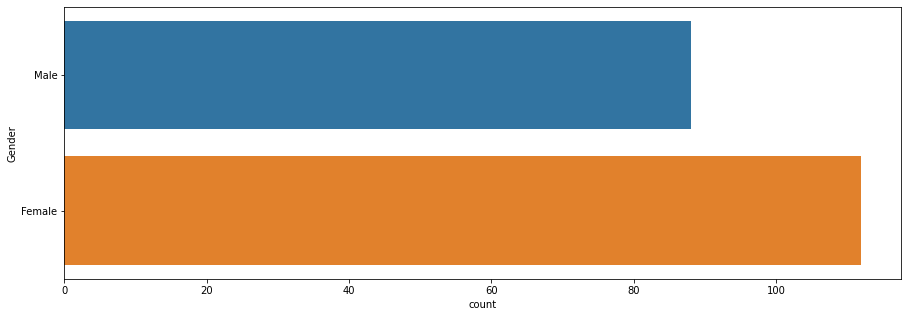

In [7]:
# count plot gender
plt.figure(1, figsize=(15, 5))
sns.countplot(y = 'Gender', data=df)
plt.show()

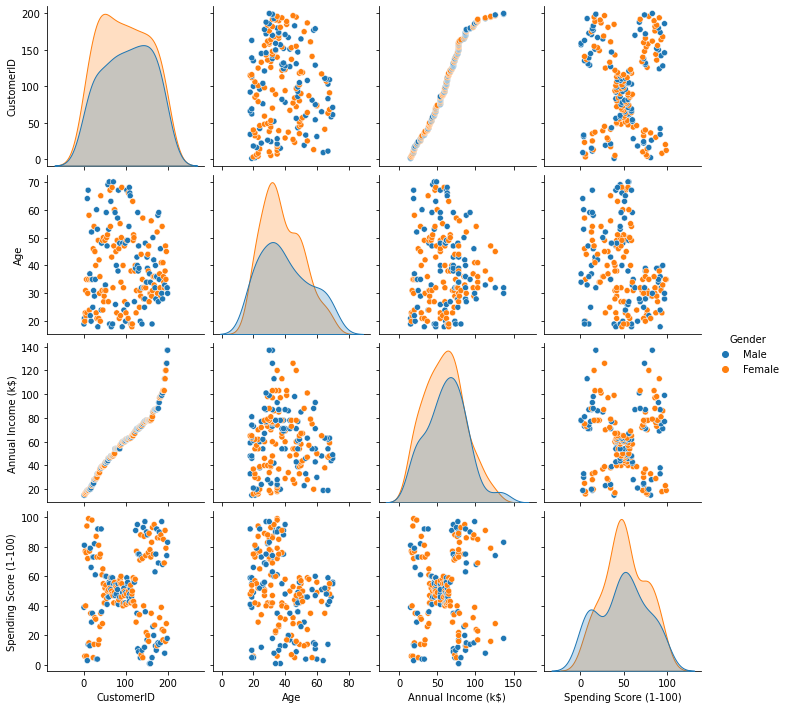

In [8]:
# pairplot gender
sns.pairplot(data=df, hue='Gender')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


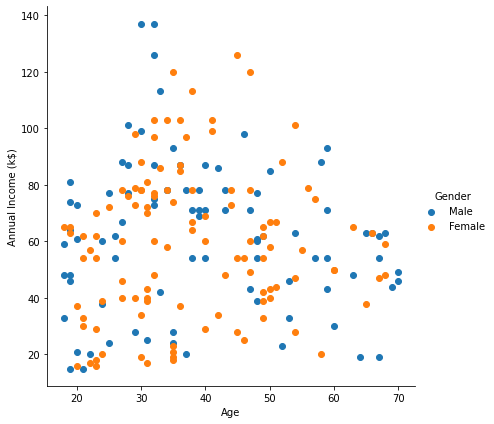

In [9]:
# visualisasi antara Age dengan Annual Income
sns.FacetGrid(df, hue='Gender', size=6).map(plt.scatter, 'Age', 'Annual Income (k$)').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


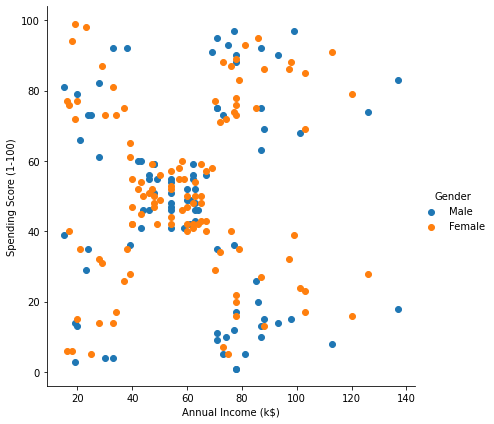

In [10]:
# Visualisasi anatara annual income dengan spending score
sns.FacetGrid(df, hue = 'Gender', size = 6).map(plt.scatter, 'Annual Income (k$)' ,'Spending Score (1-100)').add_legend()
plt.show()

Untuk gambar visualisasi antara annual income dengan spending score secara visual sudah jelas bahwa terdapat 5 cluster

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

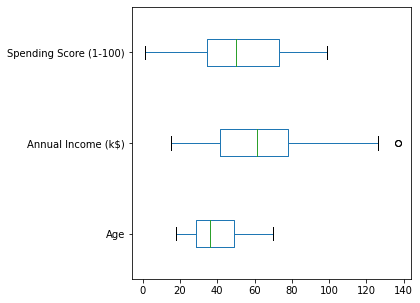

In [14]:
# cek apakah ada outlier untuk feature numerik
numeric_column = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df.boxplot(column=numeric_column, fontsize=10, rot=0, grid=False, figsize=(5,5), vert=False)
plt.show()

terdapat outlier pada feature Annual Income

In [15]:
# Hapus Outlier dengan metode IQR
Q1 = df[numeric_column].quantile(0.25) # quantile bawah
Q3 = df[numeric_column].quantile(0.75) # quantile atas

IQR = Q3 - Q1

boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

df = df.copy()
for x in numeric_column:
  filter_min = df[x]<boxplot_min[x]
  filter_max = df[x]>boxplot_max[x]
  df = df[~(
    filter_min|filter_max
    )]

In [16]:
df.shape

(198, 5)

Dari 200 data terhapus 2 data saja yang berarti hanya ada 2 outlier pada data sebelumnya

# **Model Clustering using K-Means**

Segmentation Annual Income dengan Spending Score

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
X1 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[:, :].values

In [20]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, random_state=111)
  kmeans.fit(X1)

  cluster_labels = kmeans.labels_
    
  # silhouette score
  silhouette_avg = silhouette_score(X1, cluster_labels)
  print("Untuk n_clusters={0}, nilai dari silhouette score adalah {1}".format(num_clusters, silhouette_avg))

Untuk n_clusters=2, nilai dari silhouette score adalah 0.29900633510734437
Untuk n_clusters=3, nilai dari silhouette score adalah 0.46541758070184547
Untuk n_clusters=4, nilai dari silhouette score adalah 0.497441782578338
Untuk n_clusters=5, nilai dari silhouette score adalah 0.5606825090788626
Untuk n_clusters=6, nilai dari silhouette score adalah 0.4648639816772979
Untuk n_clusters=7, nilai dari silhouette score adalah 0.4560439280820137
Untuk n_clusters=8, nilai dari silhouette score adalah 0.4542904416097836
Untuk n_clusters=9, nilai dari silhouette score adalah 0.4531839811857116


Dari hasil silhouette score didapat bahwa untuk 5 cluster mendapat nilai yang paling tinggi yaitu sekitar 0.56, maka dapat ditentukan untuk jumlah cluster antara Annual Income dengan Spending Score adalah sebanyak 5 cluster

In [21]:
# Elbow method
inertia = []
for num in range(1, 11):
  algorithm = (KMeans(n_clusters=num, init='k-means++', max_iter=300, random_state=111))
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)

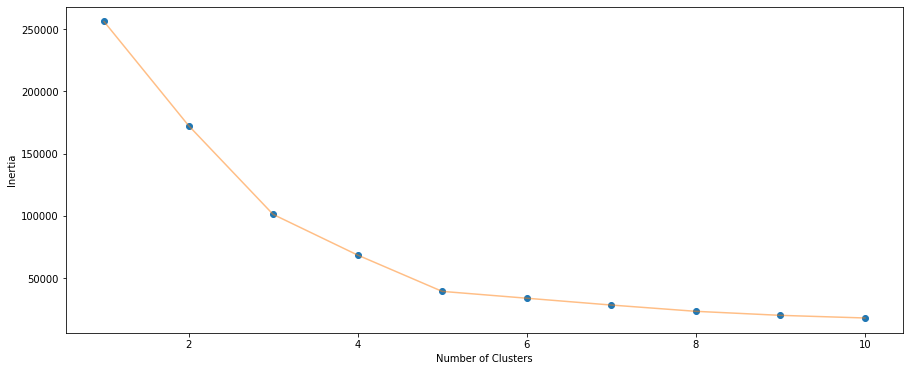

In [22]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [24]:
# mengaplikasikan K-Means
features_columns1 = ['Annual Income (k$)', 'Spending Score (1-100)']
final_feature_array1 = df[features_columns1].to_numpy()
# final_feature_array1.shape

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=111)
y_pred = kmeans.fit_predict(final_feature_array1)

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(final_feature_array1[y_pred == 0,0],final_feature_array1[y_pred == 0,1],s=100, c='grey',label='Seperlunya')
plt.scatter(final_feature_array1[y_pred == 1,0],final_feature_array1[y_pred == 1,1],s=100,c='yellow',label='Kaya')
plt.scatter(final_feature_array1[y_pred == 2,0],final_feature_array1[y_pred == 2,1],s=100,c='blue',label='Pemilih')
plt.scatter(final_feature_array1[y_pred == 3,0],final_feature_array1[y_pred == 3,1],s=100,c='red',label='Impulsive')
plt.scatter(final_feature_array1[y_pred == 4,0],final_feature_array1[y_pred == 4,1],s=100,c='green',label='Hemat')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='purple',label='Centroid')
plt.title("K-Means Clustering")
plt.axvline(x=80, ymin=0, ymax=1,c='black', label='priorities')
plt.axhline(y=70, xmin=0, xmax=1, c='black', label='priorities')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

Dapat dilihat visualisasi di atas bahwa terdapat 5 kelompok customer dengan ciri-ciri adalah kaya, seperlunya, pemilih, hemat, dan impulsive, sehingga mendapatkan insight untuk menarik hati customer bahwa :

1. Customer Kaya (Kuning) adalah customer dengan spending besar dan income besar, maka customer kaya ini direkomendasikan untuk ditawarkan paket membership yang berbentuk platinum atau gold dengan hadiah yang menarik

2. Customer Pemilih (Biru) adalah customer dengan spending kecil dan income besar, maka customer pemilih ini direkomendasikan untuk diberikan diskon terhadap produk yang biasa dia beli

3. Customer Impulsive (Merah) adalah customer dengan spending besar dan income kecil, maka customer impulsive ini direkomendasikan untuk diberikan produk event-event / promosi seperti bulanan karena cenderung tertarik melihat promo yang besar

4. Customer Hemat (Hijau) adalah customer dengan spending kecil dan income kecil, maka customer hemat ini direkomendasikan untuk diberikan produk voucher seperti belanja minimum, voucher gratis ongkir

5. Customer Seperlunya (Abu-abu) adalah customer dengan spending sedang dan income sedang, maka customer seperlunya ini direkomendasikan untuk diberikan produk voucher belanja dengan minimum belanja tertentu untuk menaikan angka spending